# Programming for Data Analysis Project 2018

This jupyter notebook contains a project for the course Programming for Data Analysis. This project will attempt to model and synthesize data from a real-world phenomenon. It also investigates the types of variables involved and the relationships of the variables with each other.

The phenomenon chosen for this project is based on a research paper [1] to determine the short term risk of death in people following healthcare-related MRSA infection. The data represents the number of people who is infected with MRSA and grouped across gender, age and mortality within 7 and 30 days post infection.  



## References

[1]  Lamagni TL, Potz N, Powell D, Pebody R, Wilson J, Duckworth G, Mortality in patients with meticillin-resistant   
     Staphylococcus aureus bacteraemia, England 2004-2005. Journal of Hospital Infection, 2010. 

[2]  Allard C, Carignan A, Bergevin M, et al. Secular changes in incidence and mortality associated with Staphylococcus 
     aureus bacteraemia in Quebec, Canada, 1991e2005. Clin Microbiol Infect 2008;14:421e428.

In [1]:
# import the packages to be used in the notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Initial calculations on the data from the research paper. 

In [3]:
# Data from the study
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
female_7day_mort = 750
male_7day_mort = 1075
female_30day_mort = 1345
male_30day_mort = 2105
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
totalmort = malemort + femalemort
totalmort

3450

#### There appears to be a higher risk of mortality in females within 7 days post infection. The study has no clear explanation for the phenomenon. This was also the case in a Canadian study [2].

In [39]:
ratio_male7daymort = male_7day_mort/infectedmale
ratio_male7daymort

0.19282511210762332

In [40]:
ratio_female7daymort = female_7day_mort/infectedfemale
ratio_female7daymort

0.21891418563922943

####  There is no significant increased risk of mortality in females than males within 30 days post infection in the study.

In [38]:
ratio_male30daymort = male_30day_mort/infectedmale
ratio_male30daymort

0.3775784753363229

In [41]:
ratio_female30daymort = female_30day_mort/infectedfemale
ratio_female30daymort

0.39258610624635143

#### Overall expected mortality ratios 

In [9]:
# The study finds lower mortality in men overall than women 
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [10]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

#### The research paper stated that mortality rates are higher in women in all age groups but the data was not presented. It was not also broken down into a monthly format between male and female. A simulation of the  

### DataFrame created from the data of the study showing the number of infections per month, and mortality within 7 and 30 days of infection.

In [11]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278)})

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

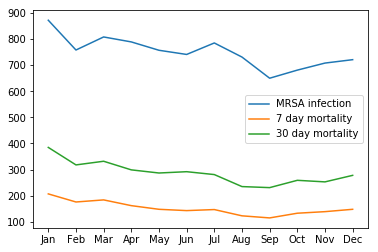

In [12]:
# line plot to visualize relationship of month to infection and mortality counts. 
ax = monthlymort.plot()
ax.set_xticks(monthlymort.index)
ax.set_xticklabels(monthlymort.Month)

In [13]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278), 'rate_of_infection': (28.129, 27.071, 26.065, 26.3, 24.419, 24.7, 25.323, 23.581, 21.667, 22.7, 23.6, 23.258)})

In [14]:
# rate_of_infection was calculated individually and 
monthlymort['7dayRate'] = monthlymort['7 day mortality'] / monthlymort['rate_of_infection']
monthlymort['30dayRate'] = monthlymort['30 day mortality'] / monthlymort['rate_of_infection']

In [15]:
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality,rate_of_infection,7dayRate,30dayRate
0,Jan,872,207,385,28.129,7.358953,13.686942
1,Feb,758,176,318,27.071,6.501422,11.746888
2,Mar,808,184,332,26.065,7.059275,12.737387
3,Apr,789,162,299,26.300,6.159696,11.368821
4,May,757,148,287,24.419,6.060854,11.753143
5,Jun,741,143,292,24.700,5.789474,11.821862
6,Jul,785,147,281,25.323,5.804999,11.096632
7,Aug,731,123,235,23.581,5.216064,9.965650
8,Sep,650,115,231,21.667,5.307611,10.661374
9,Oct,681,133,259,22.700,5.859031,11.409692


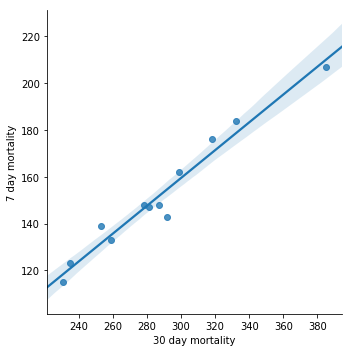

In [16]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

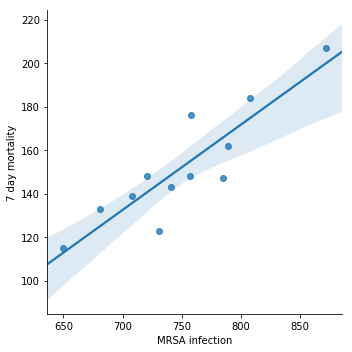

In [17]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

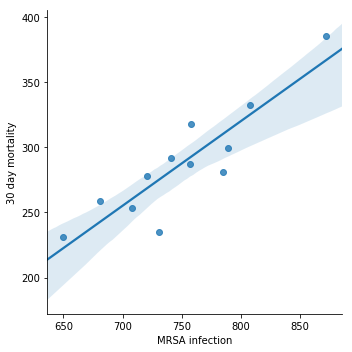

In [18]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [19]:
monthlymort.sum()

Month                JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                       9001
7 day mortality                                      1825
30 day mortality                                     3450
rate_of_infection                                 296.813
7dayRate                                          73.3706
30dayRate                                         138.922
dtype: object

In [20]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [21]:
ageMort = pd.DataFrame({"Age": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [22]:
ageMort.std()

Infections          889.474072
7 Day Mortality     247.184973
30 Day Mortality    460.494687
dtype: float64

[Text(0,0,'<15'),
 Text(0,0,'15-34'),
 Text(0,0,'35-44'),
 Text(0,0,'45-54'),
 Text(0,0,'55-64'),
 Text(0,0,'65-74'),
 Text(0,0,'75-84'),
 Text(0,0,'>85')]

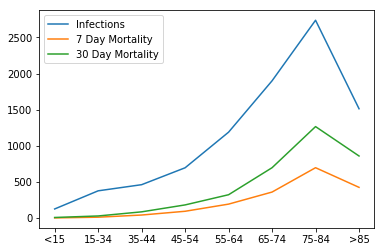

In [23]:
# line plot to visualize relationship of Age to infections and mortality counts. 
ax = ageMort.plot()
ax.set_xticks(ageMort.index)
ax.set_xticklabels(ageMort.Age)

In [24]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [25]:
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality,infection/year,7dayP,30dayP
0,<15,126,2,8,0.345205,0.015873,0.063492
1,15-34,377,12,29,1.032877,0.031830,0.076923
2,35-44,462,42,86,1.265753,0.090909,0.186147
3,45-54,696,94,182,1.906849,0.135057,0.261494
4,55-64,1189,193,323,3.257534,0.162321,0.271657
5,65-74,1900,360,697,5.205479,0.189474,0.366842
6,75-84,2738,697,1266,7.501370,0.254565,0.462381
7,>85,1513,425,859,4.145205,0.280899,0.567746


In [26]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [27]:
# Simulated data for Infections according to age per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [28]:
a

,Sim<15,Sim 15-34,Sim 35-44,Sim 45-54,Sim 55-64,Sim 65-74,Sim 75-84,Sim >85
0,1,1.015567,1.274911,1.918234,3.241652,5.215663,7.508549,4.147355
1,1,1.043587,1.264381,1.910110,3.258177,5.212189,7.500625,4.154592
2,1,1.034680,1.262543,1.912348,3.244916,5.226811,7.485095,4.136632
3,0,1.030584,1.282534,1.890720,3.279533,5.204313,7.492445,4.152627
4,1,1.028034,1.262423,1.894996,3.257932,5.178629,7.498928,4.170795
5,1,1.026097,1.264085,1.911548,3.250777,5.208613,7.518443,4.125976
6,0,1.025867,1.258127,1.916120,3.248855,5.217041,7.516114,4.162760
7,1,1.037458,1.265778,1.915609,3.268142,5.204734,7.491136,4.153458
8,0,1.044149,1.271102,1.892582,3.269042,5.211357,7.494179,4.163113
9,0,1.041757,1.259979,1.909417,3.246078,5.219777,7.511511,4.176245


In [29]:
a.sum()

Sim<15        139.000000
Sim 15-34     376.128793
Sim 35-44     463.445565
Sim 45-54     697.245088
Sim 55-64    1189.770947
Sim 65-74    1901.504734
Sim 75-84    2737.396124
Sim >85      1514.988574
dtype: float64

### 

In [30]:
# Simulated data for daily infection of males and females
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})
infection

,maleInfection,femaleInfection
0,11,7
1,18,7
2,17,6
3,19,7
4,19,11
5,18,11
6,20,11
7,19,8
8,18,10
9,12,10


In [31]:
infection.sum()

maleInfection      5660
femaleInfection    3453
dtype: int64

In [32]:
infection.describe()

,maleInfection,femaleInfection
count,365.000000,365.000000
mean,15.506849,9.460274
std,2.516557,2.347944
min,9.000000,3.000000
25%,14.000000,8.000000
50%,15.000000,9.000000
75%,17.000000,11.000000
max,23.000000,16.000000


In [33]:
pd.__version__

'0.23.0'